In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('/content/data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
df.shape

(11914, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [8]:
df.rename(columns={
    'Make': 'Merk',
    'Engine Fuel Type': 'Bahan_Bakar',
    'Engine HP': 'Tenaga',
    'Engine Cylinders': 'Silinder',
    'Transmission Type': 'Transmissi',
    'Driven_Wheels': 'Tipe_Kopling',
    'Number of Doors': 'Jumlah_Pintu',
    'Market Category': 'Sales_Penjualan',
    'Vehicle Size': 'Besar_Kendaraan',
    'Vehicle Style': 'Style_Kendaraan',
    'highway MPG': 'Highway',
    'city mpg': 'city_mpg',
    'MSRP': 'Harga'
}, inplace=True)

In [9]:
df.columns

Index(['Merk', 'Model', 'Year', 'Bahan_Bakar', 'Tenaga', 'Silinder',
       'Transmissi', 'Tipe_Kopling', 'Jumlah_Pintu', 'Sales_Penjualan',
       'Besar_Kendaraan', 'Style_Kendaraan', 'Highway', 'city_mpg',
       'Popularity', 'Harga'],
      dtype='object')

In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
other_cols = df.select_dtypes(exclude=['int64', 'float64', 'object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Other Columns (e.g., DateTime):", other_cols)

Numerical Columns: ['Year', 'Tenaga', 'Silinder', 'Jumlah_Pintu', 'Highway', 'city_mpg', 'Popularity', 'Harga']
Categorical Columns: ['Merk', 'Model', 'Bahan_Bakar', 'Transmissi', 'Tipe_Kopling', 'Sales_Penjualan', 'Besar_Kendaraan', 'Style_Kendaraan']
Other Columns (e.g., DateTime): []


In [11]:
float_columns = df.select_dtypes(include=['float']).columns
print(float_columns)

Index(['Tenaga', 'Silinder', 'Jumlah_Pintu'], dtype='object')


In [12]:
df.isnull().sum()

,0
Merk,0
Model,0
Year,0
Bahan_Bakar,3
Tenaga,69
Silinder,30
Transmissi,0
Tipe_Kopling,0
Jumlah_Pintu,6
Sales_Penjualan,3742


In [13]:
df = df.drop(columns =['Sales_Penjualan', 'Jumlah_Pintu'])

In [14]:
df.columns

Index(['Merk', 'Model', 'Year', 'Bahan_Bakar', 'Tenaga', 'Silinder',
       'Transmissi', 'Tipe_Kopling', 'Besar_Kendaraan', 'Style_Kendaraan',
       'Highway', 'city_mpg', 'Popularity', 'Harga'],
      dtype='object')

In [15]:
df.dropna(subset = ['Silinder'], inplace=True)

In [16]:
df[df['Bahan_Bakar'].isnull()]

,Merk,Model,Year,Bahan_Bakar,Tenaga,Silinder,Transmissi,Tipe_Kopling,Besar_Kendaraan,Style_Kendaraan,Highway,city_mpg,Popularity,Harga
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,18499


In [17]:
df['Bahan_Bakar'] = df['Bahan_Bakar'].fillna(df['Bahan_Bakar'].mode()[0])

In [18]:
df['Tenaga'].mode()[0]

200.0

In [19]:
df['Tenaga'].describe()

,Tenaga
count,11816.000000
mean,249.514472
std,109.261297
min,55.000000
25%,170.000000
50%,227.000000
75%,300.000000
max,1001.000000


In [20]:
df['Tenaga'] = df['Tenaga'].fillna(df['Tenaga'].median())

In [21]:
df.isnull().sum()

,0
Merk,0
Model,0
Year,0
Bahan_Bakar,0
Tenaga,0
Silinder,0
Transmissi,0
Tipe_Kopling,0
Besar_Kendaraan,0
Style_Kendaraan,0


<ipython-input-22-482da229c364>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transmissi', data=df, palette="magma")


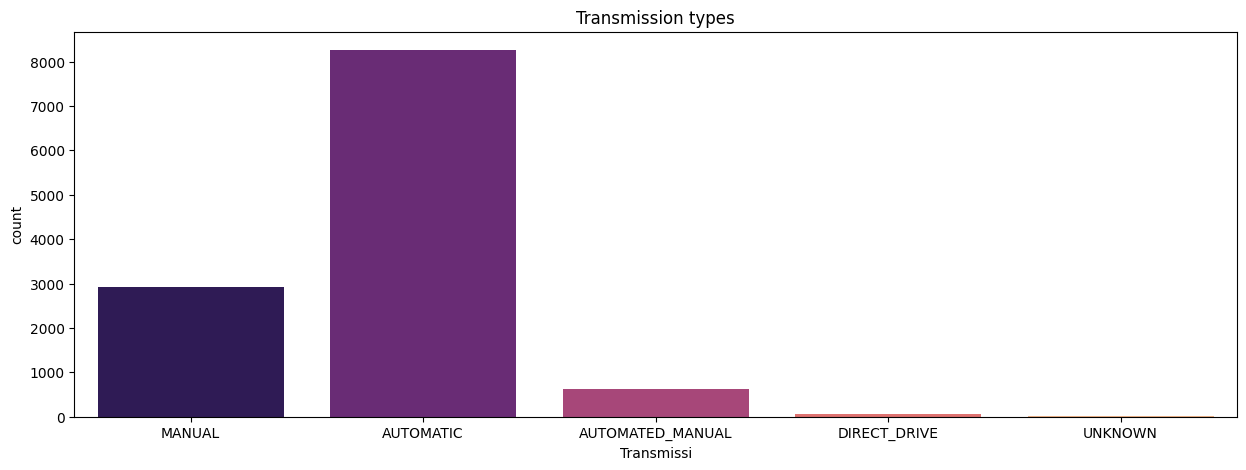

In [22]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Transmissi', data=df, palette="magma")
plt.title('Transmission types')
plt.show()

In [23]:
df[df['Transmissi'] == 'UNKNOWN'].shape

(19, 14)

In [24]:
df = df[df['Transmissi'] != 'UNKNOWN']

In [25]:
df.shape

(11865, 14)

In [26]:
df['Bahan_Bakar'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)'], dtype=object)

<ipython-input-27-e3745f8629f9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Bahan_Bakar', data=df, palette="magma")


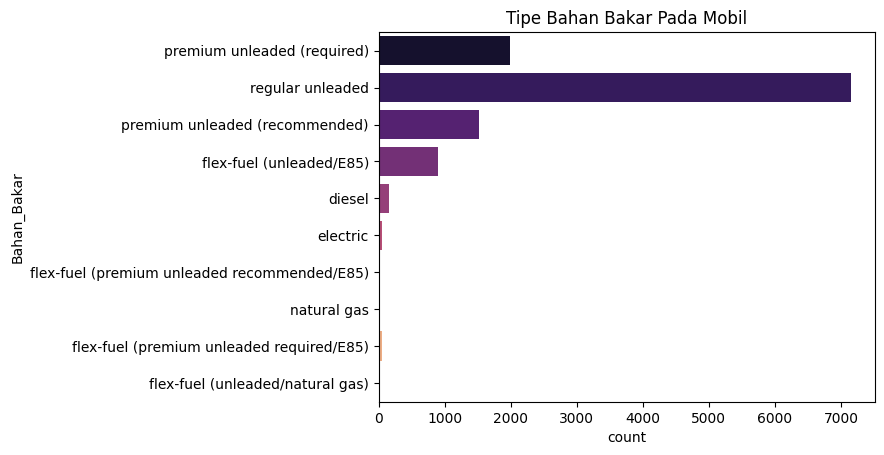

In [27]:
sns.countplot(y='Bahan_Bakar', data=df, palette="magma")
plt.title('Tipe Bahan Bakar Pada Mobil')
plt.show()

In [28]:
df['Bahan_Bakar'].value_counts()

,count
Bahan_Bakar,
regular unleaded,7153
premium unleaded (required),1992
premium unleaded (recommended),1523
flex-fuel (unleaded/E85),899
diesel,154
electric,56
flex-fuel (premium unleaded required/E85),54
flex-fuel (premium unleaded recommended/E85),26
flex-fuel (unleaded/natural gas),6


<Axes: ylabel='Frequency'>

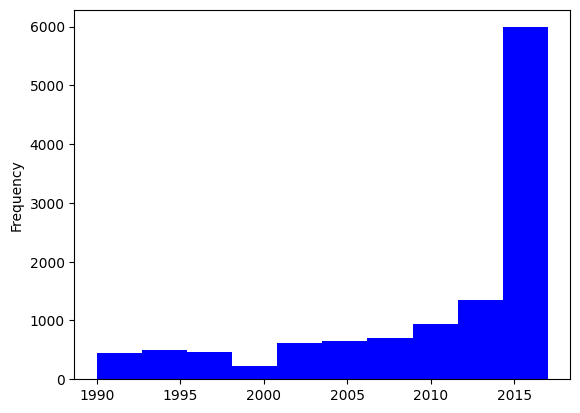

In [30]:
df['Year'].plot(kind='hist', color='blue')

In [31]:
drive_type = df['Tipe_Kopling'].value_counts(ascending=False).reset_index()
drive_type

,Tipe_Kopling,count
0,front wheel drive,4776
1,rear wheel drive,3335
2,all wheel drive,2353
3,four wheel drive,1401


In [32]:
pd.crosstab(df['Transmissi'],df['Merk'],normalize='columns')*100

Merk,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Transmissi,,,,,,,,,,,,,,,,,,,,,
AUTOMATED_MANUAL,8.333333,100.0,23.655914,36.890244,5.389222,0.0,100.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.402685,27.329193,0.000000
AUTOMATIC,68.253968,0.0,40.860215,42.682927,76.347305,100.0,0.0,100.0,97.229219,66.458519,...,100.0,54.954955,55.0,0.0,62.890625,62.678063,0.0,82.684564,37.515528,85.053381
DIRECT_DRIVE,0.000000,0.0,0.000000,0.000000,1.197605,0.0,0.0,0.0,0.000000,0.713649,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.0,0.268456,0.000000,0.000000
MANUAL,23.412698,0.0,35.483871,20.426829,17.065868,0.0,0.0,0.0,2.770781,32.827832,...,0.0,45.045045,45.0,100.0,37.109375,37.321937,0.0,16.644295,35.155280,14.946619


In [33]:
pd.crosstab(df['Tipe_Kopling'],df['Merk'],normalize='columns')*100

Merk,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Tipe_Kopling,,,,,,,,,,,,,,,,,,,,,
all wheel drive,27.380952,0.0,0.0,77.439024,43.113772,64.864865,100.0,23.979592,30.730479,4.549509,...,0.0,30.630631,0.0,0.0,86.328125,15.384615,61.111111,9.798658,8.322981,35.587189
four wheel drive,1.587302,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,9.068010,23.104371,...,0.0,0.000000,0.0,0.0,3.515625,17.378917,0.000000,25.771812,0.248447,0.000000
front wheel drive,69.444444,0.0,0.0,22.560976,0.299401,0.000000,0.0,69.387755,16.876574,34.076717,...,0.0,69.369369,80.0,0.0,5.468750,50.427350,0.000000,42.281879,90.310559,45.907473
rear wheel drive,1.587302,100.0,100.0,0.000000,56.586826,35.135135,0.0,6.632653,43.324937,38.269402,...,100.0,0.000000,20.0,100.0,4.687500,16.809117,38.888889,22.147651,1.118012,18.505338


In [34]:
top_hp = df.groupby('Merk')['Tenaga'].max().sort_values(ascending=False).reset_index().head(10)
top_hp

,Merk,Tenaga
0,Bugatti,1001.0
1,Lamborghini,750.0
2,Ferrari,731.0
3,Dodge,707.0
4,Ford,662.0
5,Chevrolet,650.0
6,McLaren,641.0
7,Mercedes-Benz,641.0
8,Cadillac,640.0
9,Maybach,631.0


<ipython-input-35-4b0a66f47c37>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x='Merk', y = 'Tenaga', data=top_hp, palette = 'magma')


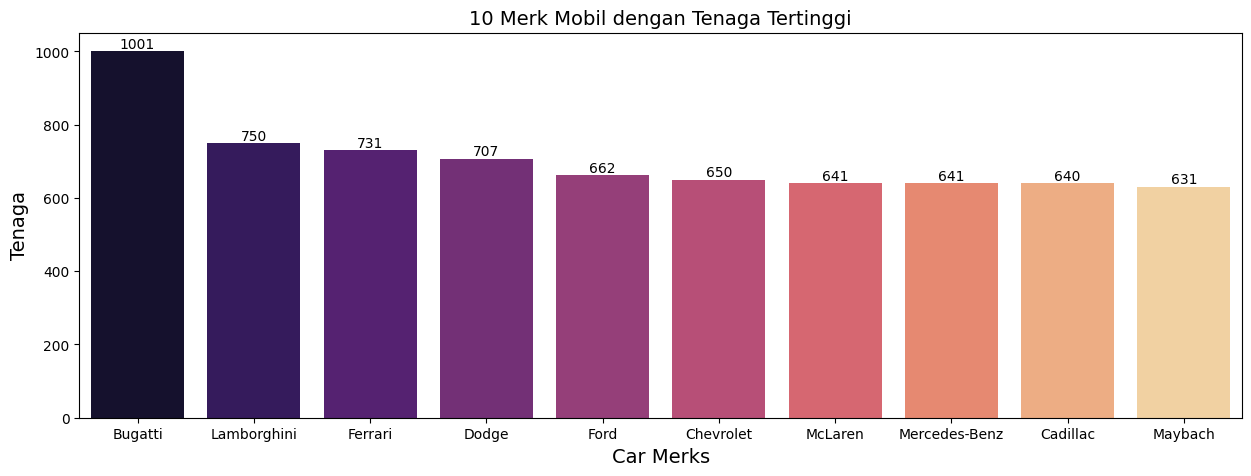

In [35]:
plt.figure(figsize=(15, 5))
fig = sns.barplot(x='Merk', y = 'Tenaga', data=top_hp, palette = 'magma')
plt.title('10 Merk Mobil dengan Tenaga Tertinggi', fontsize = 14)
plt.xlabel('Car Merks', fontsize = 14)
plt.ylabel('Tenaga', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

for i in fig.containers:
    fig.bar_label(i, fontsize = 10)

plt.show()

In [36]:
fc = df.groupby(['Bahan_Bakar'])['Silinder'].count().sort_values(ascending=False).reset_index()
fc

,Bahan_Bakar,Silinder
0,regular unleaded,7153
1,premium unleaded (required),1992
2,premium unleaded (recommended),1523
3,flex-fuel (unleaded/E85),899
4,diesel,154
5,electric,56
6,flex-fuel (premium unleaded required/E85),54
7,flex-fuel (premium unleaded recommended/E85),26
8,flex-fuel (unleaded/natural gas),6
9,natural gas,2


<Axes: xlabel='Silinder', ylabel='Bahan_Bakar'>

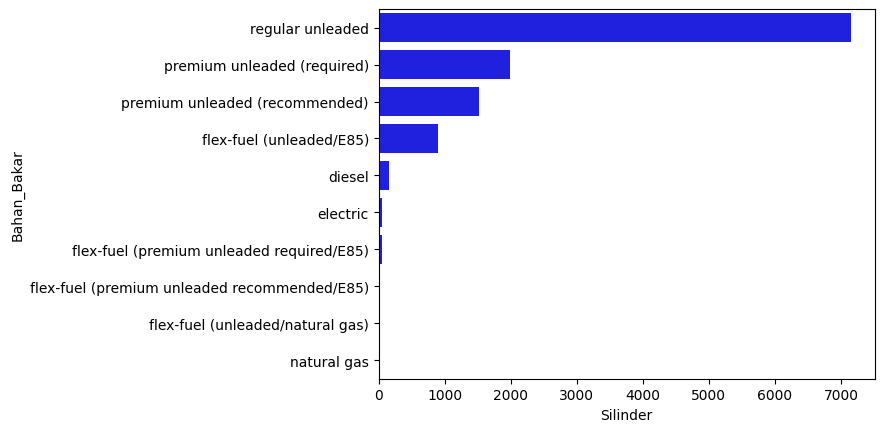

In [37]:
sns.barplot(y = 'Bahan_Bakar', x='Silinder', data = fc, color='blue')

In [38]:
top_brands = df.groupby('Merk')['Popularity'].sum().reset_index().sort_values(by='Popularity', ascending=False).head(10)
top_brands

,Merk,Popularity
14,Ford,4983817
9,Chevrolet,1552585
45,Toyota,1513095
4,BMW,1307944
11,Dodge,1143918
33,Nissan,1121022
3,Audi,1018440
18,Honda,988698
46,Volkswagen,702765
8,Cadillac,644728


<ipython-input-39-f4b2dcf30ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(data = top_brands, x='Merk', y= 'Popularity', palette='magma')


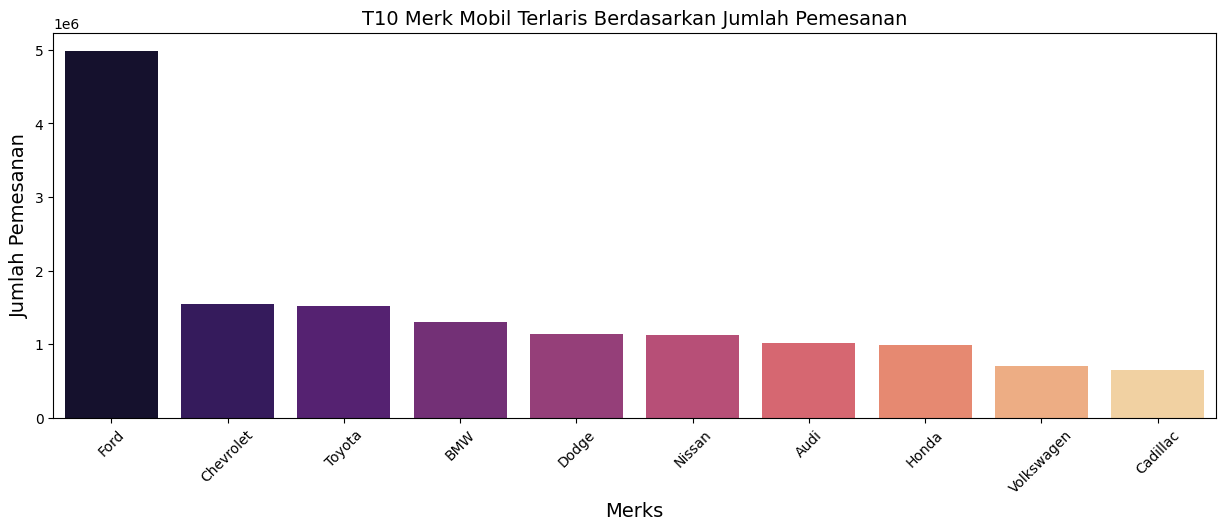

In [39]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45, fontsize=10)

fig = sns.barplot(data = top_brands, x='Merk', y= 'Popularity', palette='magma')
plt.xlabel('Merks', size=14)
plt.ylabel('Jumlah Pemesanan', size=14)
plt.title('T10 Merk Mobil Terlaris Berdasarkan Jumlah Pemesanan', size=14)
plt.show()

In [40]:
top_price = df.groupby('Merk')['Harga'].mean().sort_values(ascending=False).reset_index().head(10)
top_price

,Merk,Harga
0,Bugatti,1.757224e+06
1,Maybach,5.462219e+05
2,Rolls-Royce,3.511306e+05
3,Lamborghini,3.315673e+05
4,Bentley,2.471693e+05
5,McLaren,2.398050e+05
6,Ferrari,2.382188e+05
7,Spyker,2.133233e+05
8,Aston Martin,1.979104e+05
9,Maserati,1.142077e+05


In [41]:
top_Merks = df.groupby('Merk')['Popularity'].sum().reset_index().sort_values(by='Popularity', ascending=False).head(10)
top_Merks

,Merk,Popularity
14,Ford,4983817
9,Chevrolet,1552585
45,Toyota,1513095
4,BMW,1307944
11,Dodge,1143918
33,Nissan,1121022
3,Audi,1018440
18,Honda,988698
46,Volkswagen,702765
8,Cadillac,644728


In [42]:
top_Merks = df.groupby(['Year', 'Merk'])['Popularity'].sum().reset_index().sort_values(by='Popularity', ascending=False).head(10)
top_Merks

,Year,Merk,Popularity
714,2017,Ford,922091
681,2016,Ford,899463
645,2015,Ford,780666
636,2015,BMW,403348
702,2016,Toyota,387921
673,2016,BMW,364188
732,2017,Toyota,353394
666,2015,Toyota,347301
707,2017,BMW,309364
660,2015,Nissan,307377


In [43]:
pd.crosstab(df['Bahan_Bakar'],df['Merk'],normalize='columns')*100

Merk,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Bahan_Bakar,,,,,,,,,,,,,,,,,,,,,
diesel,0.000000,0.0,0.0,8.536585,5.988024,0.000000,0.0,0.000000,0.000000,0.089206,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,8.571429,0.000000
electric,0.000000,0.0,0.0,0.000000,1.197605,0.000000,0.0,0.000000,0.000000,0.535236,...,0.0,0.000000,0.0,0.0,0.000000,0.0,100.0,0.268456,0.000000,0.000000
flex-fuel (premium unleaded recommended/E85),0.000000,0.0,0.0,1.524390,0.000000,0.000000,0.0,0.000000,2.267003,0.000000,...,0.0,10.810811,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
flex-fuel (premium unleaded required/E85),0.000000,0.0,0.0,0.000000,0.000000,32.432432,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
flex-fuel (unleaded/E85),0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,18.877551,11.586902,22.390723,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,8.724832,0.869565,0.000000
flex-fuel (unleaded/natural gas),0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.535236,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
natural gas,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
premium unleaded (recommended),57.936508,0.0,0.0,28.658537,8.083832,0.000000,0.0,14.795918,27.959698,7.582516,...,0.0,44.144144,0.0,0.0,5.859375,0.0,0.0,0.268456,47.080745,13.879004
premium unleaded (required),17.063492,100.0,100.0,45.426829,81.736527,67.567568,100.0,1.530612,10.579345,2.854594,...,100.0,6.306306,20.0,100.0,33.203125,0.0,0.0,1.342282,3.602484,1.779359


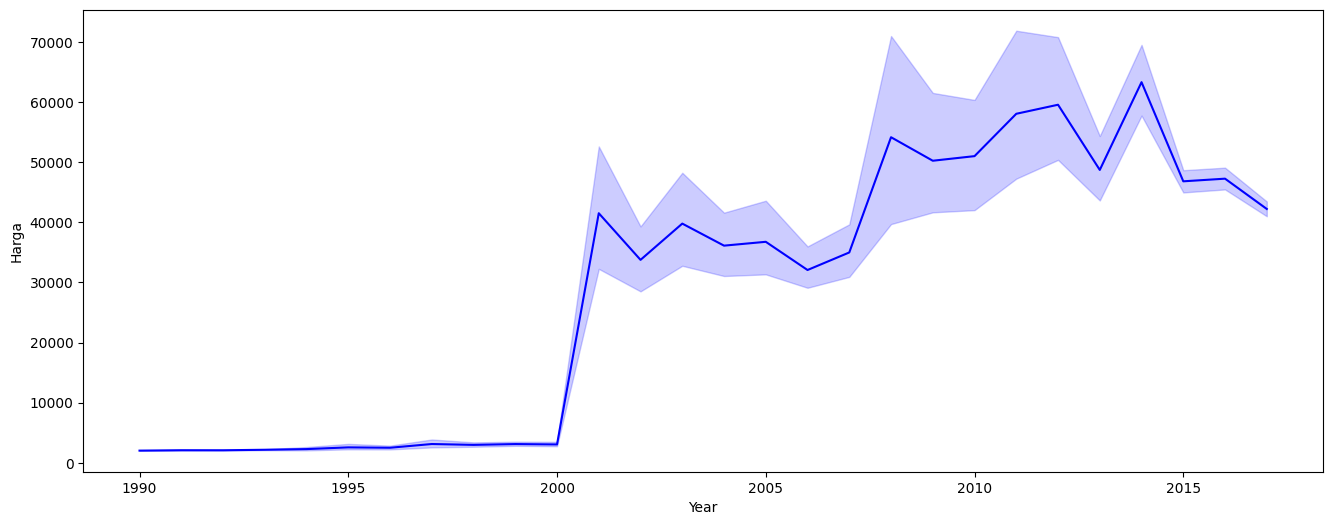

In [44]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='Year',y='Harga',data=df, color='blue')
plt.show()

In [45]:
df.pivot_table(values='Harga', index='Bahan_Bakar', aggfunc='mean').sort_values(by='Harga', ascending=False)

,Harga
Bahan_Bakar,
flex-fuel (premium unleaded required/E85),159429.351852
premium unleaded (required),102240.693273
electric,50615.089286
flex-fuel (premium unleaded recommended/E85),48641.923077
premium unleaded (recommended),40812.831254
diesel,40788.000000
flex-fuel (unleaded/natural gas),39194.166667
flex-fuel (unleaded/E85),36258.260289
natural gas,28065.000000


In [46]:
df.pivot_table(values='Harga', index='Besar_Kendaraan', aggfunc='mean').sort_values(by='Harga', ascending=False)

,Harga
Besar_Kendaraan,
Large,54040.418924
Midsize,39071.670254
Compact,34354.904842


In [47]:
df.groupby(['Merk', 'Tenaga'])['Harga'].mean().sort_values(ascending=False)

,,Harga
Merk,Tenaga,
Bugatti,1001.0,1.757224e+06
Lamborghini,650.0,1.500000e+06
Maybach,620.0,7.545083e+05
Ferrari,660.0,6.433300e+05
Lamborghini,720.0,5.232250e+05
...,...,...
Oldsmobile,180.0,2.000000e+03
Ford,96.0,2.000000e+03
Oldsmobile,225.0,2.000000e+03


In [48]:
pd.crosstab(df['Transmissi'], df['Merk'], normalize = 'columns')*100

Merk,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Transmissi,,,,,,,,,,,,,,,,,,,,,
AUTOMATED_MANUAL,8.333333,100.0,23.655914,36.890244,5.389222,0.0,100.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.402685,27.329193,0.000000
AUTOMATIC,68.253968,0.0,40.860215,42.682927,76.347305,100.0,0.0,100.0,97.229219,66.458519,...,100.0,54.954955,55.0,0.0,62.890625,62.678063,0.0,82.684564,37.515528,85.053381
DIRECT_DRIVE,0.000000,0.0,0.000000,0.000000,1.197605,0.0,0.0,0.0,0.000000,0.713649,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.0,0.268456,0.000000,0.000000
MANUAL,23.412698,0.0,35.483871,20.426829,17.065868,0.0,0.0,0.0,2.770781,32.827832,...,0.0,45.045045,45.0,100.0,37.109375,37.321937,0.0,16.644295,35.155280,14.946619


<ipython-input-49-a3d3b21a5625>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Merk',y='Harga',data=top_price, palette='magma')


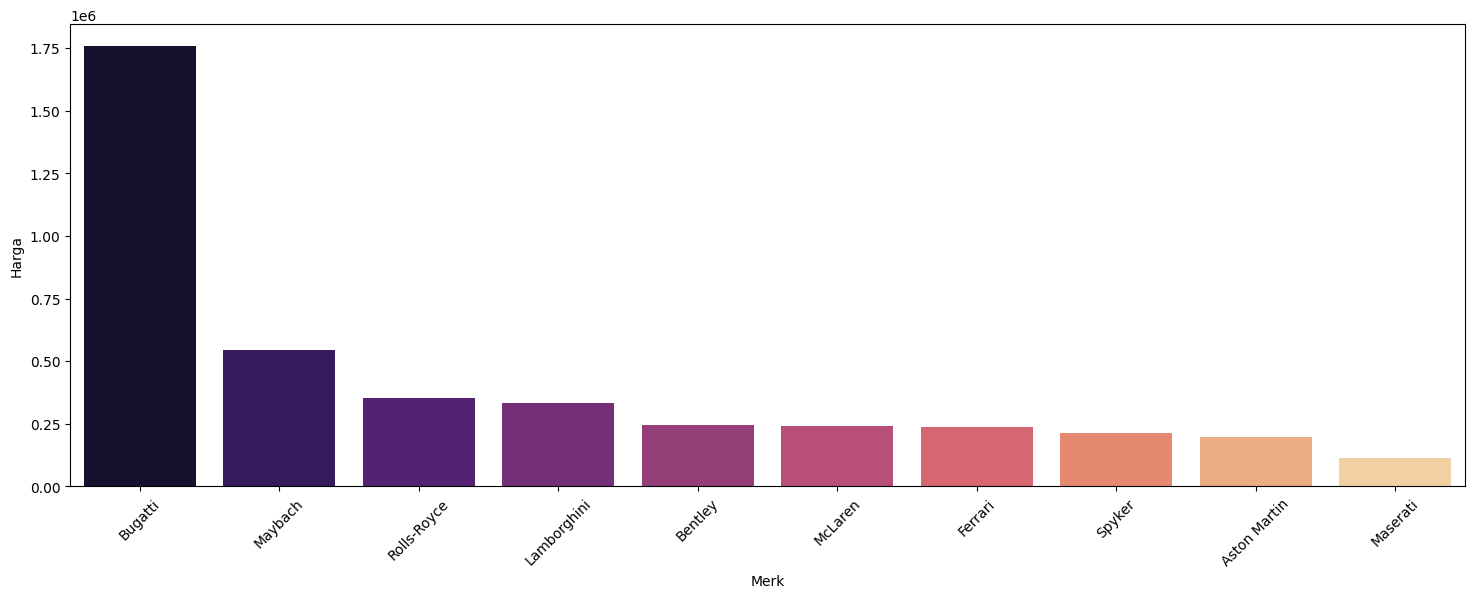

In [49]:
plt.figure(figsize=(18, 6))
plt.xticks(rotation=45, fontsize=10)
sns.barplot(x='Merk',y='Harga',data=top_price, palette='magma')
plt.show()

In [50]:
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].median(), inplace=True)

for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-50-22f0d9a50e77>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-50-22f0d9a50e77>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

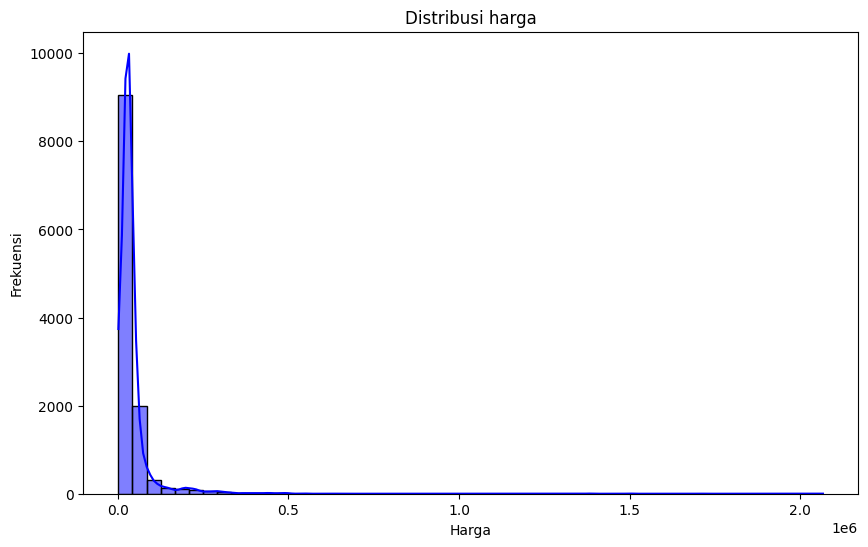

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Harga'], bins=50, kde=True, color='blue')
plt.title('Distribusi harga')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

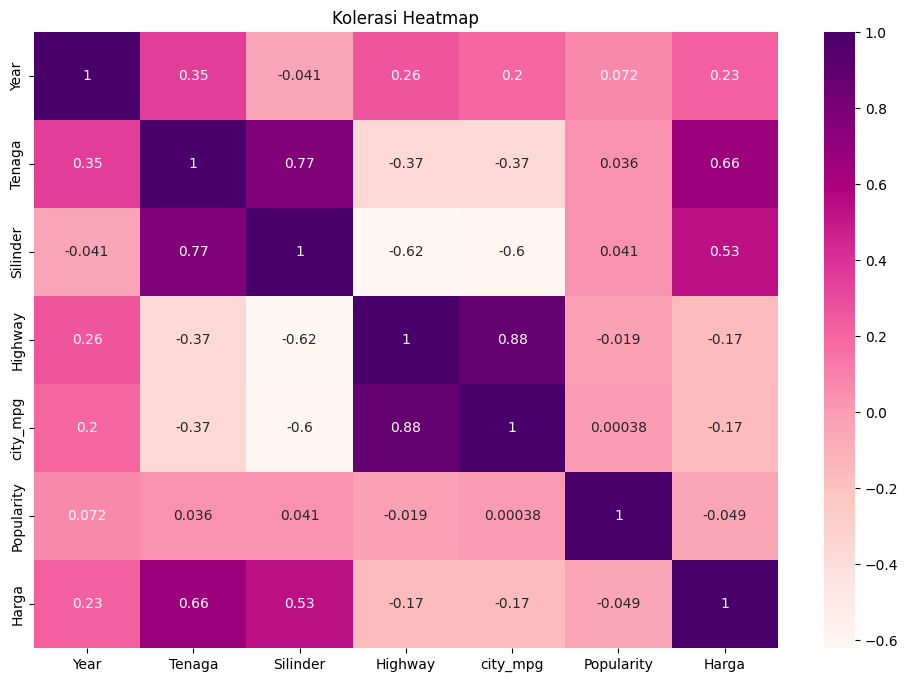

In [52]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdPu')
plt.title('Kolerasi Heatmap')
plt.show()

In [53]:
X = df[['Tenaga', 'Silinder', 'Highway', 'city_mpg', 'Popularity']]
y = df['Harga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(1735281445.8372934, 0.49736855569146166)

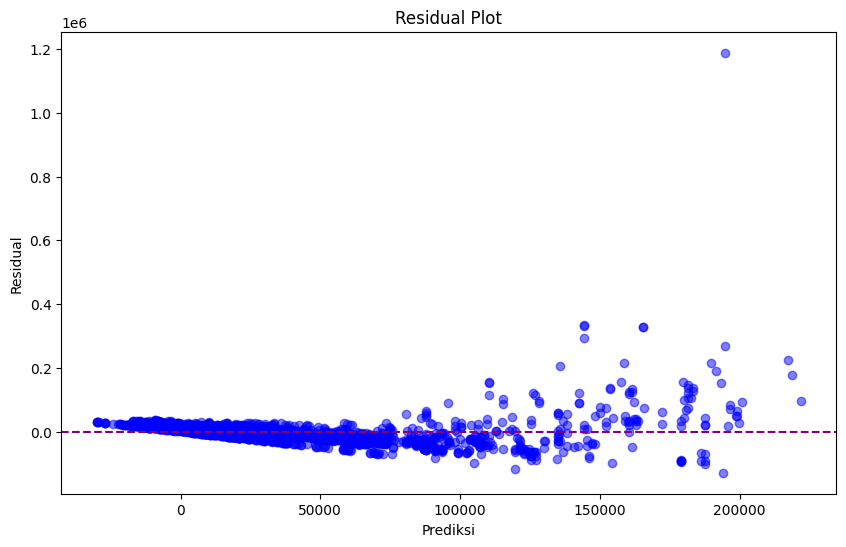

In [56]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5, color ='blue')
plt.axhline(y=0, color='purple', linestyle='--')
plt.xlabel('Prediksi')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

In [57]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)
print(coef_df)

      Feature  Coefficient
1    Silinder  6927.322554
2     Highway   670.377405
3    city_mpg   555.545496
0      Tenaga   317.738228
4  Popularity    -3.161339


In [58]:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validation scores: {scores}")
print(f"Mean R-squared: {scores.mean()}")

Cross-validation scores: [0.54029902 0.54602862 0.45225014 0.38738158 0.35361405]
Mean R-squared: 0.45591468242754607
